# Mini-batch gradient descent
---
***Author: Piotr Skalski***

## Imports

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import time

# my implementation of a densely connected neural network 
import fully_connected_nn

## Settings

In [44]:
# neural network architecture
NN_ARCHITECTURE = [
    {"input_dim": 2, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 1, "activation": "sigmoid"},
]

# number of samples in the data set
N_SAMPLES = 1000

# ratio between training and test sets
TEST_PERCENTAGE = 0.1

# number of epochs
N_EPOCHS = 5000

# learning rate value
LR = 0.01

## Plotting functions

In [45]:
# the function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    
    if(file_name):
        plt.savefig(file_name)
        plt.close()

In [46]:
# the function forming loss and accuracy graph
def make_graph(simple_data, batch_data, plot_name, file_name=None):
    plt.figure(figsize=(12,8))
    sns.set_style("whitegrid")
    plt.plot(simple_data)
    plt.plot(batch_data)
    plt.title(plot_name, fontsize=20)
    plt.ylabel('value')
    plt.xlabel('iterations')
    plt.legend(['simple', 'mini-batch'], loc='upper left')
    
    if(file_name):
        plt.savefig(file_name)
        plt.close()

## Simple exercise illustrating the gradient descent of the basic version and mini-batch

### Create artificial dataset

In [47]:
X, y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_PERCENTAGE, random_state=42)

# Preparation of the data set. Subsequent examples should be stored in subsequent columns. 
# We need to transpose the datasets.

X_train = np.transpose(X_train)
y_train = np.transpose(y_train.reshape((y_train.shape[0], 1)))
X_test = np.transpose(X_test)
y_test = np.transpose(y_test.reshape((y_test.shape[0], 1)))

### Visualization of the dataset

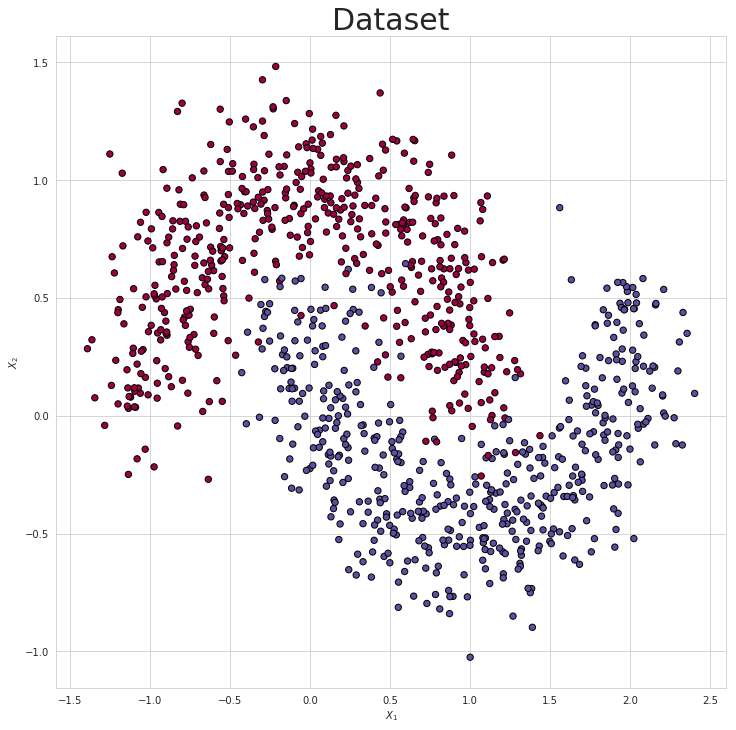

In [48]:
make_plot(X, y, "Dataset")

### Basic model training

In [73]:
start = time.time()

params_values_base, cost_history_base, accuracy_history_base = fully_connected_nn.train(
    X_train, y_train, NN_ARCHITECTURE, N_EPOCHS, LR)

end = time.time()
train_time_base = end - start
print("Train set accuracy: {:.2f}".format(accuracy_history_base[-1]))
print("Training time: {:.2f} sec".format(train_time_base))

Train set accuracy: 0.89
Training time: 18.11 sec


### Making predictions

In [74]:
Y_test_hat_base, _ = fully_connected_nn.full_forward_propagation(X_test, params_values_base, NN_ARCHITECTURE)

In [75]:
acc_test_base = fully_connected_nn.get_accuracy_value(Y_test_hat_base, y_test)
print("Accuracy: {:.2f}".format(acc_test_base))

Accuracy: 0.85


### Implementation using batches

In [76]:
def train_batch(X, Y, nn_architecture, epochs, learning_rate, batch_size = 64, verbose=False, callback=None):
    params_values = fully_connected_nn.init_layers(nn_architecture, 2)
    cost_history = []
    accuracy_history = []
    
    # Beginning of additional code snippet
    examples_size = X.shape[1]
    batch_number = examples_size // batch_size
    # Ending of additional code snippet
    
    for i in range(epochs):
        # Beginning of additional code snippet
        batch_idx = epochs % batch_number
        X_batch = X[:, batch_idx * batch_size : (batch_idx + 1) * batch_size]
        Y_batch = Y[:, batch_idx * batch_size : (batch_idx + 1) * batch_size]
        # Ending of additional code snippet
        
        Y_hat, cashe = fully_connected_nn.full_forward_propagation(X_batch, params_values, nn_architecture)
        
        cost = fully_connected_nn.get_cost_value(Y_hat, Y_batch)
        cost_history.append(cost)
        accuracy = fully_connected_nn.get_accuracy_value(Y_hat, Y_batch)
        accuracy_history.append(accuracy)
        
        grads_values = fully_connected_nn.full_backward_propagation(Y_hat, Y_batch, cashe, params_values, nn_architecture)
        params_values = fully_connected_nn.update(params_values, grads_values, nn_architecture, learning_rate)
        
        if(i % 50 == 0):
            if(verbose):
                print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(i, cost, accuracy))
            if(callback is not None):
                callback(i, params_values)
            
    return params_values, cost_history, accuracy_history

### Basic model training

In [77]:
start = time.time()

params_values_batch, cost_history_batch, accuracy_history_batch = train_batch(
    X_train, y_train, NN_ARCHITECTURE, N_EPOCHS, LR, 64)

end = time.time()
train_time_batch = end - start
print("Train set accuracy: {:.2f}".format(accuracy_history_batch[-1]))
print("Training time: {:.2f} sec".format(train_time_batch))

Train set accuracy: 0.94
Training time: 2.66 sec


### Making predictions

In [60]:
Y_test_hat_batch, _ = fully_connected_nn.full_forward_propagation(X_test, params_values_batch, NN_ARCHITECTURE)

In [61]:
acc_test_batch = fully_connected_nn.get_accuracy_value(Y_test_hat_batch, y_test)
print("Test set accuracy: {:.2f}".format(acc_test_batch))

Test set accuracy: 0.85


### Visualisation of the change in cost function and accuracy value during training

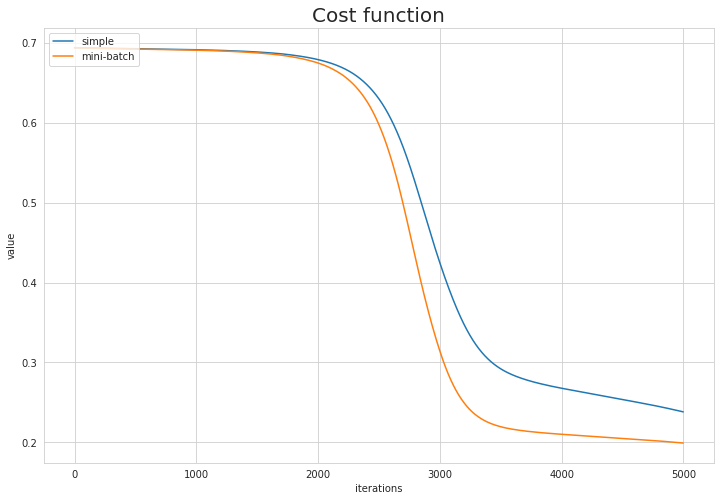

In [56]:
make_graph(cost_history_base, cost_history_batch, "Cost function")

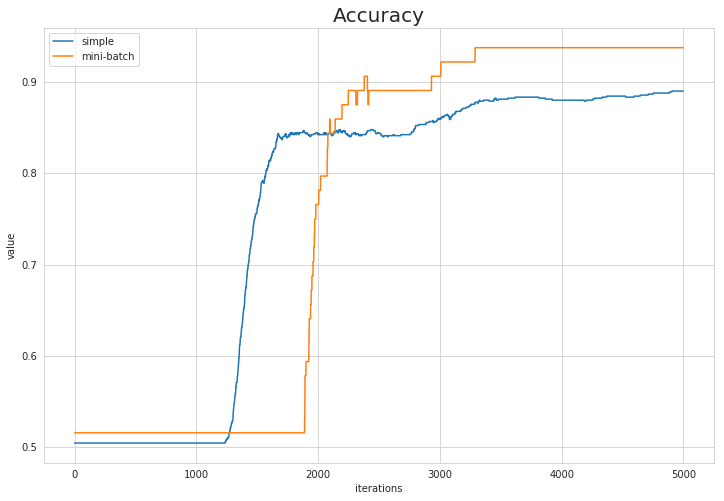

In [57]:
make_graph(accuracy_history_base, accuracy_history_batch, "Accuracy")

## Summary of obtained results 

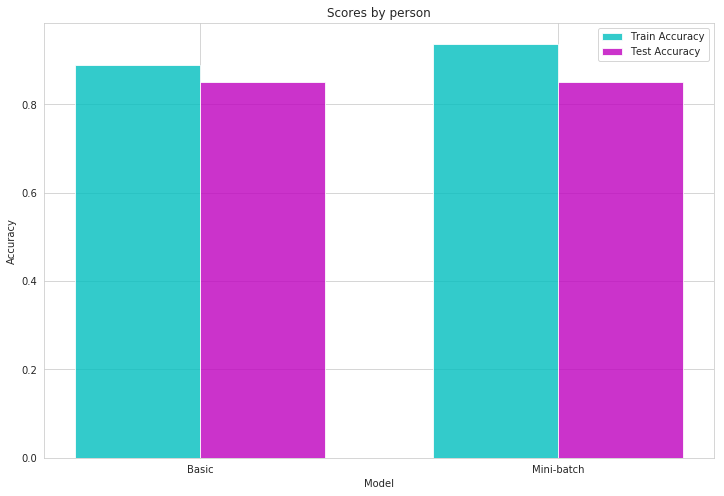

In [85]:
n_groups = 2
train_acc = (accuracy_history_base[-1], accuracy_history_batch[-1])
test_acc = (acc_test_base, acc_test_batch)
 
# create plot
fig, ax = plt.subplots(figsize=(12,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, train_acc, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Train Accuracy')
 
rects2 = plt.bar(index + bar_width, test_acc, bar_width,
                 alpha=opacity,
                 color='m',
                 label='Test Accuracy')
 
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Scores by person')
plt.xticks(index + bar_width / 2, ('Basic', 'Mini-batch'))
plt.legend()